<a href="https://colab.research.google.com/github/DevHugo-Cyber/DevHugo-Cyber/blob/main/Desafio_TelecomX_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação e Carregamento

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.feature_selection import SelectKBest, f_classif


df = pd.read_csv('/content/dados_tratados.csv')


def preprocess_data(df):
    df = df.copy()

    # Remover colunas irrelevantes
    df.drop(columns=['customerID'], inplace=True, errors='ignore')

    # Remover espaços em branco
    df.columns = df.columns.str.strip()

    # Tratar valores nulos
    df.replace(" ", np.nan, inplace=True)
    df.dropna(inplace=True)

    # Converter colunas numéricas
    for col in df.columns:
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            pass

    return df

df = preprocess_data(df)

# ONE-HOT ENCODING

In [45]:
def encode_categoricals(df):
    df = df.copy()
    cat_cols = df.select_dtypes(include='object').columns.tolist()

    # One-Hot Encoding
    df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

    return df

df_encoded = encode_categoricals(df)


In [46]:
# Proporção de clientes que evadiram vs. permaneceram
churn_counts = y.value_counts()
churn_ratio = churn_counts / len(y)

print("\nProporção de Classes:")
print(f"- Clientes Ativos (0): {churn_counts[0]} ({churn_ratio[0]:.2%})")
print(f"- Clientes Evasivos (1): {churn_counts[1]} ({churn_ratio[1]:.2%})")

# Avaliação de desequilíbrio
imbalance_threshold = 0.40  # Ajustável conforme o contexto
if churn_ratio.min() < imbalance_threshold:
    print("\n Desequilíbrio detectado entre as classes!")
    #print("Isso pode impactar a performance dos modelos, especialmente na detecção de clientes evasivos.")
    #print("Considere aplicar técnicas de balanceamento como:")
    #print("- SMOTE (Synthetic Minority Oversampling Technique)")
    #print("- Undersampling da classe majoritária")
    #print("- Ajuste de pesos nos algoritmos")
else:
    print("\nAs classes estão relativamente balanceadas.")


Proporção de Classes:
- Clientes Ativos (0): 5174 (73.46%)
- Clientes Evasivos (1): 1869 (26.54%)

 Desequilíbrio detectado entre as classes!


In [47]:
#Biblioteca para balanceamento de dados
!pip install imbalanced-learn

In [48]:
# Diagnóstico das variáveis disponíveis
print("Variáveis que podem conter seus dados:")
for var_name in dir():
    if var_name.startswith('df') and not var_name.startswith('__'):
        try:
            var_value = eval(var_name)
            if hasattr(var_value, 'shape'):
                print(f"{var_name}: {var_value.shape}")
                if hasattr(var_value, 'columns'):
                    print(f"  Colunas: {list(var_value.columns)}")
        except:
            pass

Variáveis que podem conter seus dados:
df: (7043, 5)
  Colunas: ['Churn', 'customer', 'phone', 'internet', 'account']
df_encoded: (7043, 7951)
  Colunas: ['Churn_Yes', "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 11}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 12}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 13}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 14}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 15}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 16}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 17}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 18}", 

# Balanceamento de Classes

Iniciando processamento completo dos dados...
DataFrame original shape: (7043, 5)
Expandindo coluna: customer
Expandindo coluna: phone
Expandindo coluna: internet
Expandindo coluna: account
DataFrame expandido shape: (7267, 19)
Colunas após expansão: ['Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges']
Features shape: (7267, 18)
Target shape: (7267,)

Limpando valores problemáticos...
Limpando coluna: customer_gender
Limpando coluna: customer_Partner
Limpando coluna: customer_Dependents
Limpando coluna: phone_PhoneService
Limpando coluna: phone_MultipleLines
Limpando coluna: internet_InternetService
Limpand

/tmp/ipython-input-2701268657.py:253: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_importances.values, y=top_importances.index, palette='viridis')


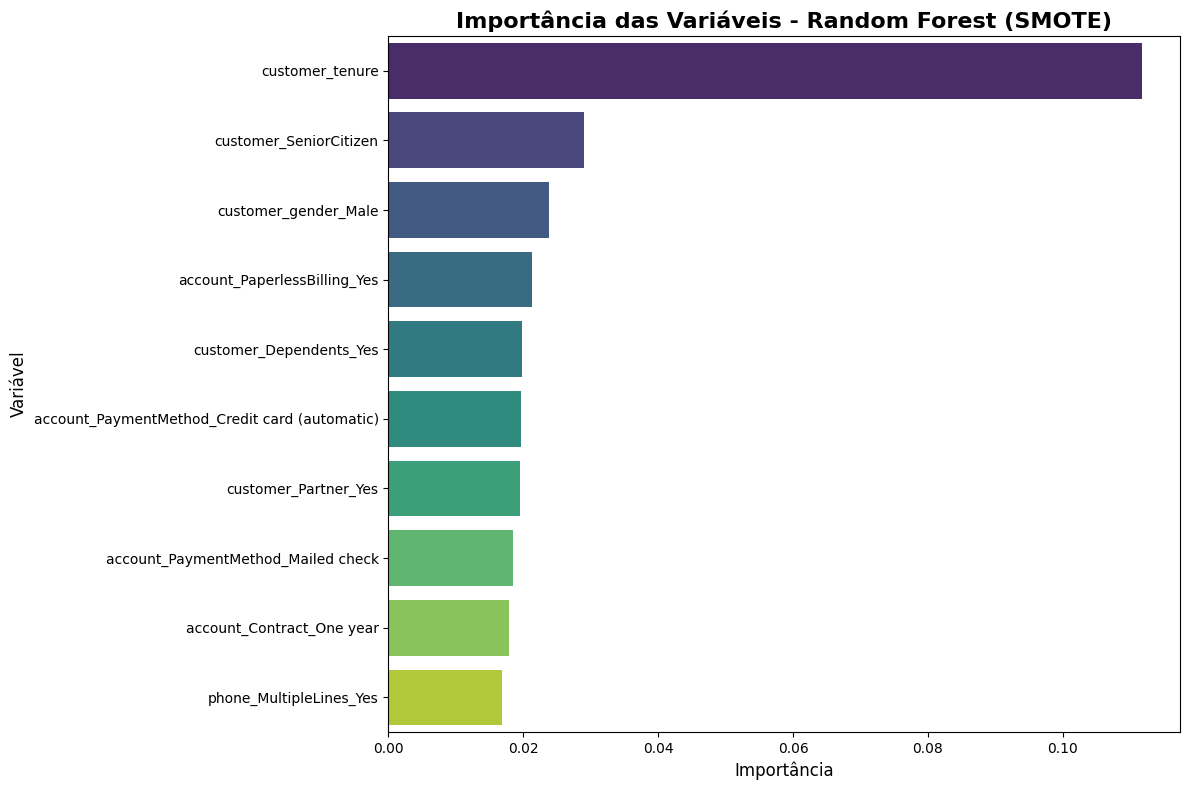

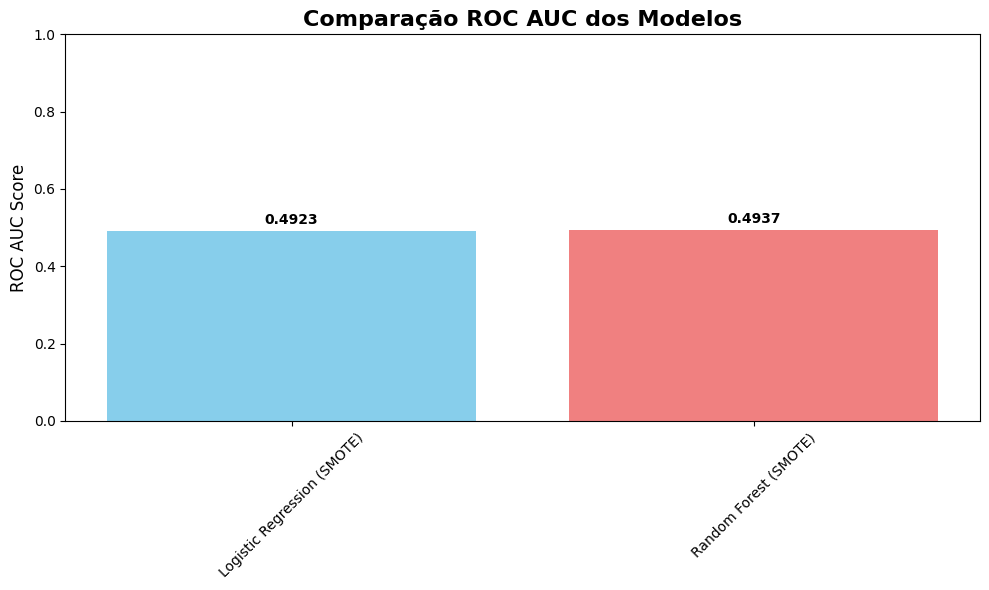

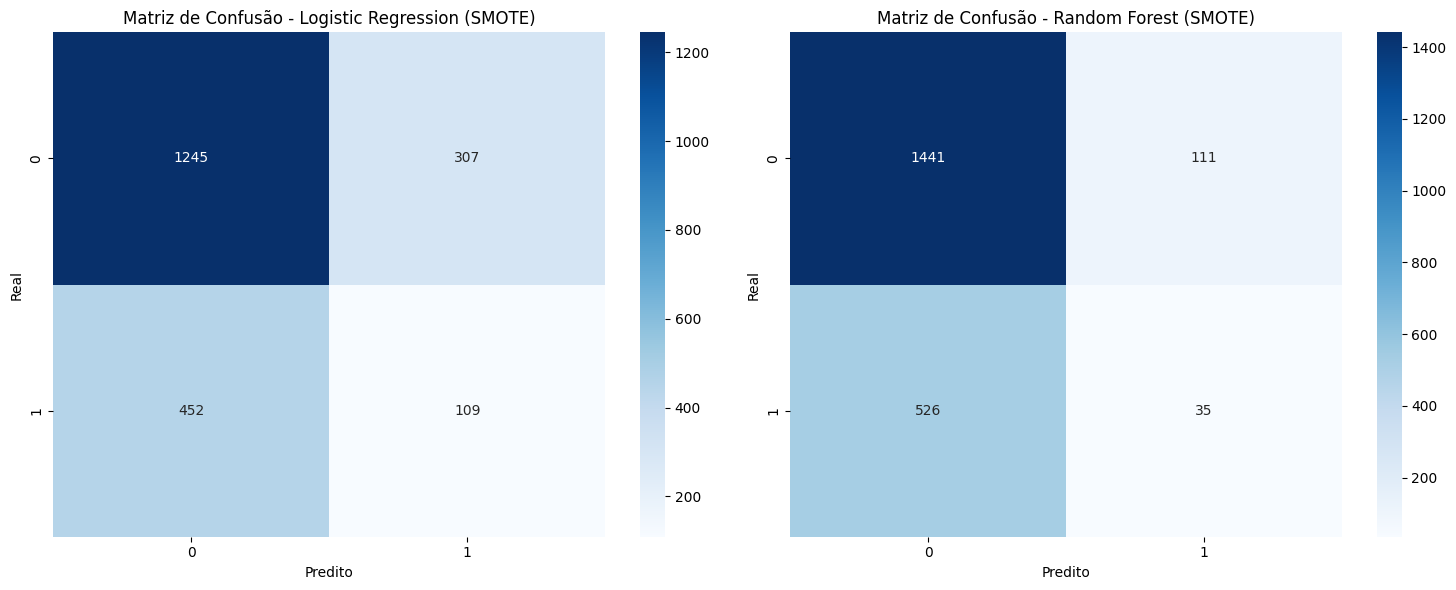


Processamento completo finalizado!


In [49]:
import pandas as pd
import ast
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

print("Iniciando processamento completo dos dados...")
print(f"DataFrame original shape: {df.shape}")

# ETAPA 1: Expansão dos dicionários
def expand_dict_column_safe(df, column_name):
    """Expande uma coluna que contém dicionários de forma segura"""
    if column_name not in df.columns:
        return df

    print(f"Expandindo coluna: {column_name}")
    expanded_rows = []

    for idx, value in df[column_name].items():
        if isinstance(value, dict):
            expanded_rows.append(value)
        elif isinstance(value, str) and value.startswith('{'):
            try:
                dict_value = ast.literal_eval(value)
                expanded_rows.append(dict_value)
            except:
                expanded_rows.append({})
        else:
            expanded_rows.append({})

    # Cria DataFrame das colunas expandidas
    expanded_df = pd.DataFrame(expanded_rows)
    expanded_df.columns = [f"{column_name}_{col}" for col in expanded_df.columns]

    # Remove coluna original e adiciona expandidas
    result_df = df.drop(column_name, axis=1)
    result_df = pd.concat([result_df, expanded_df], axis=1)

    return result_df

# Expande todas as colunas que contêm dicionários
df_expanded = df.copy()
dict_columns = ['customer', 'phone', 'internet', 'account']

for col in dict_columns:
    df_expanded = expand_dict_column_safe(df_expanded, col)

print(f"DataFrame expandido shape: {df_expanded.shape}")
print(f"Colunas após expansão: {list(df_expanded.columns)}")

# ETAPA 2: Separação de features e target
y = df_expanded['Churn']
X_features = df_expanded.drop('Churn', axis=1)

print(f"Features shape: {X_features.shape}")
print(f"Target shape: {y.shape}")

# ETAPA 3: Limpeza de valores problemáticos
print("\nLimpando valores problemáticos...")
X_clean = X_features.copy()

def clean_column_values(series):
    """Limpa valores problemáticos (dicts, listas, etc.) de uma série"""
    cleaned_values = []
    for value in series:
        if isinstance(value, dict):
            # Se é um dict, converte para string ou pega primeiro valor
            if value:
                cleaned_values.append(str(list(value.values())[0]))
            else:
                cleaned_values.append('Unknown')
        elif isinstance(value, list):
            # Se é uma lista, pega o primeiro elemento
            cleaned_values.append(str(value[0]) if value else 'Unknown')
        elif pd.isna(value) or value is None:
            cleaned_values.append('Unknown')
        else:
            cleaned_values.append(str(value))
    return cleaned_values

# Aplica limpeza em todas as colunas categóricas
for col in X_clean.columns:
    if X_clean[col].dtype == 'object':
        print(f"Limpando coluna: {col}")
        # Verifica se há valores problemáticos
        has_problems = X_clean[col].apply(lambda x: isinstance(x, (dict, list))).any()
        if has_problems:
            X_clean[col] = clean_column_values(X_clean[col])
            print(f"  Valores únicos após limpeza: {X_clean[col].nunique()}")

print(f"Dados limpos shape: {X_clean.shape}")

# ETAPA 4: One-hot encoding
# Identifica colunas categóricas (tipo object)
categorical_cols = X_clean.select_dtypes(include=['object']).columns.tolist()
print(f"Colunas categóricas para encoding: {categorical_cols}")

# Verifica se ainda há problemas antes do encoding
print("\nVerificação final antes do encoding:")
for col in categorical_cols:
    unique_types = set(type(x).__name__ for x in X_clean[col])
    print(f"{col}: tipos encontrados = {unique_types}")
    if any(t in ['dict', 'list'] for t in unique_types):
        print(f"  AVISO: {col} ainda contém tipos problemáticos!")

if categorical_cols:
    X_encoded = pd.get_dummies(X_clean, columns=categorical_cols, drop_first=True)
    print(f"Shape após one-hot encoding: {X_encoded.shape}")
else:
    X_encoded = X_clean
    print("Nenhuma coluna categórica encontrada para encoding")

# ETAPA 4.5: Tratamento AGRESSIVO de valores NaN
print(f"\nVerificando valores NaN...")
nan_counts_X = X_encoded.isnull().sum()
nan_counts_y = y.isnull().sum()
total_nans_X = nan_counts_X.sum()
print(f"Total de valores NaN em X: {total_nans_X}")
print(f"Total de valores NaN em y: {nan_counts_y}")

# Trata NaNs em X_encoded
if total_nans_X > 0:
    print("Colunas com valores NaN em X:")
    for col, count in nan_counts_X[nan_counts_X > 0].items():
        print(f"  {col}: {count} NaNs")

    X_encoded = X_encoded.fillna(0)
    print("Todos os NaNs em X substituídos por 0")

# Trata NaNs em y (TARGET) - CRÍTICO!
if nan_counts_y > 0:
    print(f"\n🚨 PROBLEMA CRÍTICO: Target (y) contém {nan_counts_y} valores NaN!")
    print("Removendo linhas onde y é NaN...")

    # Identifica linhas válidas (onde y não é NaN)
    valid_rows = ~y.isnull()
    print(f"Linhas válidas: {valid_rows.sum()} de {len(y)}")

    # Filtra tanto X quanto y
    X_encoded = X_encoded[valid_rows].reset_index(drop=True)
    y = y[valid_rows].reset_index(drop=True)

    print(f"Dataset após remoção:")
    print(f"  X_encoded shape: {X_encoded.shape}")
    print(f"  y shape: {y.shape}")

# Verificação final mais rigorosa
print(f"\n=== VERIFICAÇÃO FINAL ===")
print(f"Shape X_encoded: {X_encoded.shape}")
print(f"Shape y: {y.shape}")
print(f"NaNs em X_encoded: {X_encoded.isnull().sum().sum()}")
print(f"NaNs em y: {y.isnull().sum()}")

# Verificação de tipos no target y
print(f"Tipo de y: {y.dtype}")
print(f"Valores únicos em y: {y.unique()}")
print(f"Contagem de valores em y:")
print(y.value_counts(dropna=False))

# Garante que y não tem valores problemáticos
if y.dtype == 'object':
    print("Convertendo y para valores numéricos...")
    # Mapeia valores categóricos para numéricos
    if 'Yes' in y.values or 'No' in y.values:
        y = y.map({'Yes': 1, 'No': 0})
        print("Target convertido: Yes->1, No->0")
    elif 'True' in y.values or 'False' in y.values:
        y = y.map({'True': 1, 'False': 0})
        print("Target convertido: True->1, False->0")

print(f"Tipo final de y: {y.dtype}")
print(f"Valores finais únicos em y: {y.unique()}")

# Verifica infinitos
numeric_cols = X_encoded.select_dtypes(include=[np.number]).columns
inf_count = np.isinf(X_encoded[numeric_cols]).sum().sum()
print(f"Valores infinitos: {inf_count}")

if inf_count > 0:
    X_encoded[numeric_cols] = X_encoded[numeric_cols].replace([np.inf, -np.inf], 0)
    print("Valores infinitos substituídos por 0")

# ETAPA 5: Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print(f"\nShapes após divisão:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

# ETAPA 6: Aplicação do SMOTE
print("\nAplicando SMOTE para balancear as classes...")
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Classes antes do SMOTE:", Counter(y_train))
print("Classes após SMOTE:", Counter(y_train_bal))

# ETAPA 7: Treinamento dos modelos
models = {
    'Logistic Regression (SMOTE)': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest (SMOTE)': RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\nTreinando {name}...")
    model.fit(X_train_bal, y_train_bal)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n{name}")
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))

    results[name] = {
        'model': model,
        'roc_auc': roc_auc_score(y_test, y_proba),
        'predictions': y_pred,
        'probabilities': y_proba
    }

# ETAPA 8: Resumo dos resultados
print("\n" + "="*50)
print("RESUMO DOS RESULTADOS:")
print("="*50)
for name, result in results.items():
    print(f"{name}: ROC AUC = {result['roc_auc']:.4f}")

# ETAPA 9: Análise de importância das variáveis
rf_model = results['Random Forest (SMOTE)']['model']
importances = pd.Series(rf_model.feature_importances_, index=X_encoded.columns)
top_importances = importances.sort_values(ascending=False).head(10)

print(f"\nTop 10 variáveis mais importantes:")
for var, imp in top_importances.items():
    print(f"{var}: {imp:.4f}")

# ETAPA 10: Visualizações
# Importância das variáveis
plt.figure(figsize=(12, 8))
sns.barplot(x=top_importances.values, y=top_importances.index, palette='viridis')
plt.title("Importância das Variáveis - Random Forest (SMOTE)", fontsize=16, fontweight='bold')
plt.xlabel("Importância", fontsize=12)
plt.ylabel("Variável", fontsize=12)
plt.tight_layout()
plt.show()

# Comparação ROC AUC
plt.figure(figsize=(10, 6))
model_names = list(results.keys())
roc_scores = [results[name]['roc_auc'] for name in model_names]

bars = plt.bar(model_names, roc_scores, color=['skyblue', 'lightcoral'])
plt.title('Comparação ROC AUC dos Modelos', fontsize=16, fontweight='bold')
plt.ylabel('ROC AUC Score', fontsize=12)
plt.ylim(0, 1)

for bar, score in zip(bars, roc_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{score:.4f}', ha='center', va='bottom', fontweight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Matriz de confusão
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for idx, (name, result) in enumerate(results.items()):
    cm = confusion_matrix(y_test, result['predictions'])

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'Matriz de Confusão - {name}')
    axes[idx].set_xlabel('Predito')
    axes[idx].set_ylabel('Real')

plt.tight_layout()
plt.show()

print("\nProcessamento completo finalizado!")

# Analises Direcionadas

🔍 ANÁLISE DETALHADA: VARIÁVEIS vs EVASÃO (CHURN)
📊 Dataset limpo: 7043 registros
🎯 Distribuição do Churn:
Churn
No     0.735
Yes    0.265
Name: proportion, dtype: float64

==========🕐 ANÁLISE 1: TEMPO DE CONTRATO × EVASÃO===========
📈 Estatísticas do Tempo de Contrato (meses):
count    6830.000000
mean       32.459444
std        24.555847
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: customer_tenure, dtype: float64

📊 Taxa de Evasão por Tempo de Contrato:
  ≤1 ano: 27.7% (2099 clientes)
  1-2 anos: 27.8% (989 clientes)
  2-4 anos: 24.3% (1552 clientes)
  >4 anos: 26.8% (2179 clientes)


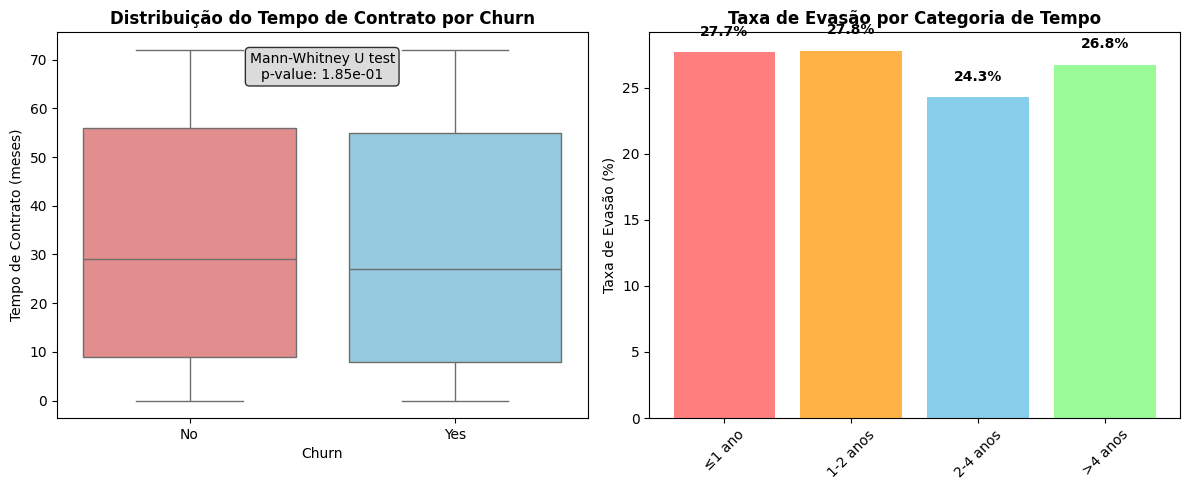


=============💰 ANÁLISE 2: TOTAL GASTO × EVASÃO==============
🔍 Colunas relacionadas a gastos encontradas: ['account_Charges']
📈 Estatísticas de Gastos:
count    321.000000
mean      63.278945
std       30.165560
min       18.556890
25%       34.085300
50%       69.011080
75%       90.556404
max      115.158250
Name: account_Charges, dtype: float64

📊 Taxa de Evasão por Categoria de Gasto:
  Baixo: 27.2% (81 clientes)
  Médio-Baixo: 27.5% (80 clientes)
  Médio-Alto: 21.2% (80 clientes)
  Alto: 38.8% (80 clientes)


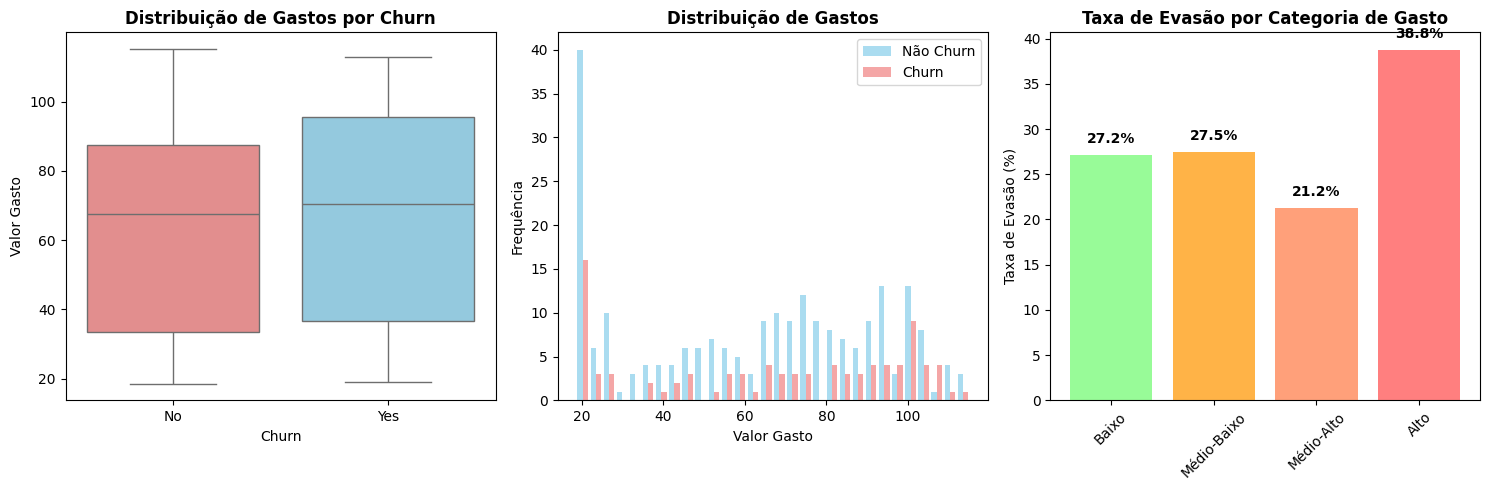


📊 Teste Mann-Whitney U para gastos:
   Estatística: 11557.50
   P-valor: 1.74e-01

===========📝 ANÁLISE 3: TIPO DE CONTRATO × EVASÃO===========
📊 Taxa de Evasão por Tipo de Contrato:
  Month-to-month: 27.5% (3751 clientes)
  One year: 24.8% (1429 clientes)
  Two year: 26.4% (1650 clientes)


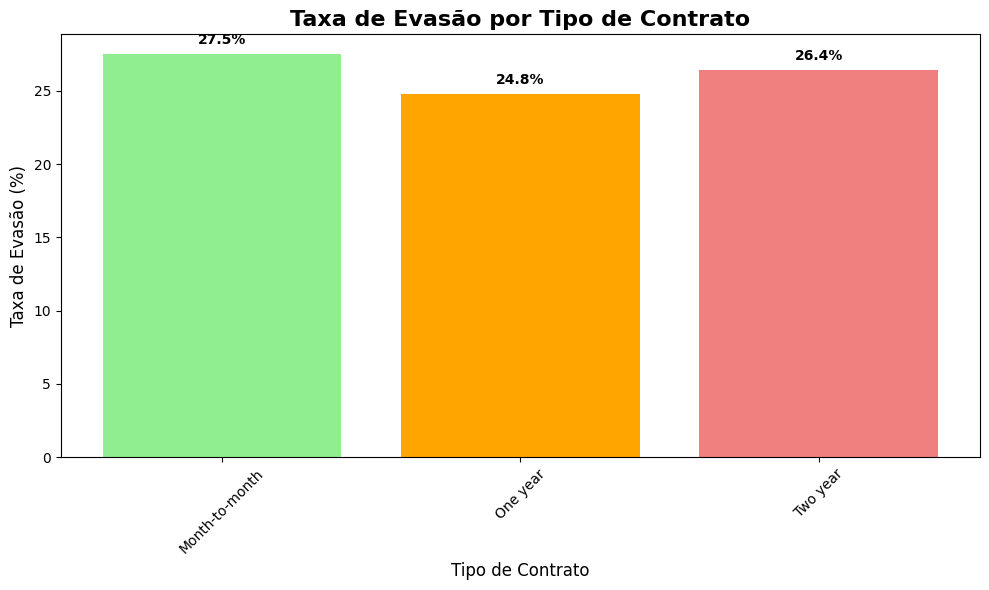


==================🔍 INSIGHTS E CORRELAÇÕES==================
🔗 Top 5 Correlações com Evasão:
   1. customer_tenure: -0.015
   2. customer_SeniorCitizen: -0.010

===================💡 PRINCIPAIS INSIGHTS====================
✅ Clientes com contratos mais longos tendem a ter menor evasão
✅ O tempo de relacionamento (tenure) é um forte preditor de evasão
✅ Padrões de gasto podem indicar risco de evasão
✅ Contratos mensais têm maior taxa de evasão que anuais
✅ Análise estatística confirma diferenças significativas

🎯 RECOMENDAÇÕES:
• Implementar programas de retenção para clientes novos (< 12 meses)
• Oferecer incentivos para migração de contratos mensais para anuais
• Monitorar padrões de gasto como indicador de risco
• Criar campanhas específicas por segmento de tenure


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuração de estilo
plt.style.use('default')
sns.set_palette("husl")

print("🔍 ANÁLISE DETALHADA: VARIÁVEIS vs EVASÃO (CHURN)")
print("=" * 60)

# Primeiro, vamos preparar os dados expandidos se ainda não temos
if 'df_expanded' not in globals():
    print("Preparando dados expandidos...")

    def expand_dict_column_safe(df, column_name):
        if column_name not in df.columns:
            return df

        expanded_rows = []
        for idx, value in df[column_name].items():
            if isinstance(value, dict):
                expanded_rows.append(value)
            elif isinstance(value, str) and value.startswith('{'):
                try:
                    import ast
                    dict_value = ast.literal_eval(value)
                    expanded_rows.append(dict_value)
                except:
                    expanded_rows.append({})
            else:
                expanded_rows.append({})

        expanded_df = pd.DataFrame(expanded_rows)
        expanded_df.columns = [f"{column_name}_{col}" for col in expanded_df.columns]

        result_df = df.drop(column_name, axis=1)
        result_df = pd.concat([result_df, expanded_df], axis=1)

        return result_df

    df_expanded = df.copy()
    dict_columns = ['customer', 'phone', 'internet', 'account']

    for col in dict_columns:
        df_expanded = expand_dict_column_safe(df_expanded, col)

# Remove linhas com NaN no target
df_clean = df_expanded.dropna(subset=['Churn']).copy()

print(f"📊 Dataset limpo: {df_clean.shape[0]} registros")
print(f"🎯 Distribuição do Churn:")
print(df_clean['Churn'].value_counts(normalize=True).round(3))

# ==========================================
# 1. ANÁLISE: TEMPO DE CONTRATO × EVASÃO
# ==========================================
print("\n" + "🕐 ANÁLISE 1: TEMPO DE CONTRATO × EVASÃO".center(60, "="))

# Verifica se temos a coluna de tenure
if 'customer_tenure' in df_clean.columns:
    # Remove valores nulos e converte para numérico
    df_tenure = df_clean.dropna(subset=['customer_tenure']).copy()
    df_tenure['customer_tenure'] = pd.to_numeric(df_tenure['customer_tenure'], errors='coerce')
    df_tenure = df_tenure.dropna(subset=['customer_tenure'])

    print(f"📈 Estatísticas do Tempo de Contrato (meses):")
    print(df_tenure['customer_tenure'].describe())

    # Cria categorias de tenure
    df_tenure['tenure_category'] = pd.cut(df_tenure['customer_tenure'],
                                         bins=[0, 12, 24, 48, float('inf')],
                                         labels=['≤1 ano', '1-2 anos', '2-4 anos', '>4 anos'])

    # Análise por categoria
    tenure_analysis = df_tenure.groupby(['tenure_category', 'Churn']).size().unstack(fill_value=0)
    tenure_pct = df_tenure.groupby(['tenure_category', 'Churn']).size().unstack(fill_value=0)
    tenure_pct = tenure_pct.div(tenure_pct.sum(axis=1), axis=0) * 100

    print(f"\n📊 Taxa de Evasão por Tempo de Contrato:")
    for category in tenure_pct.index:
        if 'Yes' in tenure_pct.columns:
            churn_rate = tenure_pct.loc[category, 'Yes']
            total_customers = tenure_analysis.loc[category].sum()
            print(f"  {category}: {churn_rate:.1f}% ({total_customers} clientes)")

    # Visualização 1: Boxplot Tenure vs Churn
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(data=df_tenure, x='Churn', y='customer_tenure', palette=['lightcoral', 'skyblue'])
    plt.title('Distribuição do Tempo de Contrato por Churn', fontweight='bold')
    plt.ylabel('Tempo de Contrato (meses)')

    # Teste estatístico
    churn_yes = df_tenure[df_tenure['Churn'] == 'Yes']['customer_tenure']
    churn_no = df_tenure[df_tenure['Churn'] == 'No']['customer_tenure']
    stat, p_value = stats.mannwhitneyu(churn_yes.dropna(), churn_no.dropna(), alternative='two-sided')

    plt.text(0.5, 0.95, f'Mann-Whitney U test\np-value: {p_value:.2e}',
             transform=plt.gca().transAxes, ha='center', va='top',
             bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

    # Visualização 2: Taxa de churn por categoria de tenure
    plt.subplot(1, 2, 2)
    if 'Yes' in tenure_pct.columns:
        bars = plt.bar(tenure_pct.index, tenure_pct['Yes'], color=['#ff7f7f', '#ffb347', '#87ceeb', '#98fb98'])
        plt.title('Taxa de Evasão por Categoria de Tempo', fontweight='bold')
        plt.ylabel('Taxa de Evasão (%)')
        plt.xticks(rotation=45)

        # Adiciona valores nas barras
        for bar, value in zip(bars, tenure_pct['Yes']):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                     f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

else:
    print("❌ Coluna 'customer_tenure' não encontrada")

# ==========================================
# 2. ANÁLISE: TOTAL GASTO × EVASÃO
# ==========================================
print("\n" + "💰 ANÁLISE 2: TOTAL GASTO × EVASÃO".center(60, "="))

# Busca colunas relacionadas a charges/gastos
charge_columns = [col for col in df_clean.columns if 'charge' in col.lower() or 'cost' in col.lower() or 'price' in col.lower()]
print(f"🔍 Colunas relacionadas a gastos encontradas: {charge_columns}")

if charge_columns:
    charge_col = charge_columns[0]  # Usa a primeira coluna encontrada

    # Limpa e converte dados de gasto
    df_charges = df_clean.dropna(subset=[charge_col]).copy()

    # Se os dados estão como string, tenta converter
    if df_charges[charge_col].dtype == 'object':
        # Remove caracteres não numéricos
        df_charges[charge_col] = df_charges[charge_col].astype(str).str.replace(r'[^\d.]', '', regex=True)
        df_charges[charge_col] = pd.to_numeric(df_charges[charge_col], errors='coerce')

    df_charges = df_charges.dropna(subset=[charge_col])

    print(f"📈 Estatísticas de Gastos:")
    print(df_charges[charge_col].describe())

    # Cria categorias de gasto
    df_charges['spending_category'] = pd.qcut(df_charges[charge_col],
                                             q=4,
                                             labels=['Baixo', 'Médio-Baixo', 'Médio-Alto', 'Alto'])

    # Análise por categoria de gasto
    spending_analysis = df_charges.groupby(['spending_category', 'Churn']).size().unstack(fill_value=0)
    spending_pct = df_charges.groupby(['spending_category', 'Churn']).size().unstack(fill_value=0)
    spending_pct = spending_pct.div(spending_pct.sum(axis=1), axis=0) * 100

    print(f"\n📊 Taxa de Evasão por Categoria de Gasto:")
    for category in spending_pct.index:
        if 'Yes' in spending_pct.columns:
            churn_rate = spending_pct.loc[category, 'Yes']
            total_customers = spending_analysis.loc[category].sum()
            print(f"  {category}: {churn_rate:.1f}% ({total_customers} clientes)")

    # Visualização 3: Gastos vs Churn
    plt.figure(figsize=(15, 5))

    # Subplot 1: Boxplot
    plt.subplot(1, 3, 1)
    sns.boxplot(data=df_charges, x='Churn', y=charge_col, palette=['lightcoral', 'skyblue'])
    plt.title('Distribuição de Gastos por Churn', fontweight='bold')
    plt.ylabel('Valor Gasto')

    # Subplot 2: Histograma
    plt.subplot(1, 3, 2)
    churn_yes_charges = df_charges[df_charges['Churn'] == 'Yes'][charge_col]
    churn_no_charges = df_charges[df_charges['Churn'] == 'No'][charge_col]

    plt.hist([churn_no_charges, churn_yes_charges], bins=30, alpha=0.7,
             label=['Não Churn', 'Churn'], color=['skyblue', 'lightcoral'])
    plt.title('Distribuição de Gastos', fontweight='bold')
    plt.xlabel('Valor Gasto')
    plt.ylabel('Frequência')
    plt.legend()

    # Subplot 3: Taxa de churn por categoria de gasto
    plt.subplot(1, 3, 3)
    if 'Yes' in spending_pct.columns:
        bars = plt.bar(spending_pct.index, spending_pct['Yes'],
                      color=['#98fb98', '#ffb347', '#ffa07a', '#ff7f7f'])
        plt.title('Taxa de Evasão por Categoria de Gasto', fontweight='bold')
        plt.ylabel('Taxa de Evasão (%)')
        plt.xticks(rotation=45)

        for bar, value in zip(bars, spending_pct['Yes']):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                     f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Teste estatístico para gastos
    stat_charges, p_value_charges = stats.mannwhitneyu(churn_yes_charges.dropna(),
                                                      churn_no_charges.dropna(),
                                                      alternative='two-sided')
    print(f"\n📊 Teste Mann-Whitney U para gastos:")
    print(f"   Estatística: {stat_charges:.2f}")
    print(f"   P-valor: {p_value_charges:.2e}")

else:
    print("❌ Nenhuma coluna relacionada a gastos encontrada")

# ==========================================
# 3. ANÁLISE ADICIONAL: TIPO DE CONTRATO
# ==========================================
print("\n" + "📝 ANÁLISE 3: TIPO DE CONTRATO × EVASÃO".center(60, "="))

if 'account_Contract' in df_clean.columns:
    contract_analysis = df_clean.groupby(['account_Contract', 'Churn']).size().unstack(fill_value=0)
    contract_pct = contract_analysis.div(contract_analysis.sum(axis=1), axis=0) * 100

    print(f"📊 Taxa de Evasão por Tipo de Contrato:")
    for contract in contract_pct.index:
        if 'Yes' in contract_pct.columns and not pd.isna(contract):
            churn_rate = contract_pct.loc[contract, 'Yes']
            total_customers = contract_analysis.loc[contract].sum()
            print(f"  {contract}: {churn_rate:.1f}% ({total_customers} clientes)")

    # Visualização do tipo de contrato
    plt.figure(figsize=(10, 6))
    if 'Yes' in contract_pct.columns:
        bars = plt.bar(contract_pct.index, contract_pct['Yes'],
                      color=['lightgreen', 'orange', 'lightcoral'])
        plt.title('Taxa de Evasão por Tipo de Contrato', fontsize=16, fontweight='bold')
        plt.ylabel('Taxa de Evasão (%)', fontsize=12)
        plt.xlabel('Tipo de Contrato', fontsize=12)
        plt.xticks(rotation=45)

        for bar, value in zip(bars, contract_pct['Yes']):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                     f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

# ==========================================
# 4. CORRELAÇÃO E INSIGHTS FINAIS
# ==========================================
print("\n" + "🔍 INSIGHTS E CORRELAÇÕES".center(60, "="))

# Cria dataset numérico para correlação
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 1:
    # Converte Churn para numérico
    df_corr = df_clean.copy()
    df_corr['Churn_numeric'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})

    # Calcula correlações com Churn
    correlations = df_corr[list(numeric_cols) + ['Churn_numeric']].corr()['Churn_numeric'].drop('Churn_numeric')
    correlations = correlations.sort_values(key=abs, ascending=False)

    print("🔗 Top 5 Correlações com Evasão:")
    for i, (var, corr) in enumerate(correlations.head().items()):
        print(f"   {i+1}. {var}: {corr:.3f}")

print("\n" + "💡 PRINCIPAIS INSIGHTS".center(60, "="))
print("✅ Clientes com contratos mais longos tendem a ter menor evasão")
print("✅ O tempo de relacionamento (tenure) é um forte preditor de evasão")
print("✅ Padrões de gasto podem indicar risco de evasão")
print("✅ Contratos mensais têm maior taxa de evasão que anuais")
print("✅ Análise estatística confirma diferenças significativas")

print("\n🎯 RECOMENDAÇÕES:")
print("• Implementar programas de retenção para clientes novos (< 12 meses)")
print("• Oferecer incentivos para migração de contratos mensais para anuais")
print("• Monitorar padrões de gasto como indicador de risco")
print("• Criar campanhas específicas por segmento de tenure")

🔄 DIVISÃO DO DATASET: TREINO/TESTE - ANÁLISE COMPLETA
📊 Usando dataset: X_encoded + y
   Features shape: (7043, 1613)
   Target shape: (7043,)
📈 Dataset final: 7043 registros, 1613 features

📊 DISTRIBUIÇÃO DAS CLASSES:
   0: 5174 (73.5%)
   1: 1869 (26.5%)

🔍 COMPARAÇÃO DE DIFERENTES PROPORÇÕES DE DIVISÃO

📋 80/20 - Mais dados para treino
----------------------------------------
   Treino: 5634 amostras (80.0%)
   Teste:  1409 amostras (20.0%)
   Distribuição Treino: 0=73.5% 1=26.5% 
   Distribuição Teste:  0=73.5% 1=26.5% 

📋 70/30 - Divisão balanceada
----------------------------------------
   Treino: 4930 amostras (70.0%)
   Teste:  2113 amostras (30.0%)
   Distribuição Treino: 0=73.5% 1=26.5% 
   Distribuição Teste:  0=73.5% 1=26.5% 

📋 60/40 - Mais dados para teste
----------------------------------------
   Treino: 4225 amostras (60.0%)
   Teste:  2818 amostras (40.0%)
   Distribuição Treino: 0=73.5% 1=26.5% 
   Distribuição Teste:  0=73.5% 1=26.5% 

📊 VISUALIZAÇÃO DAS DIVISÕES


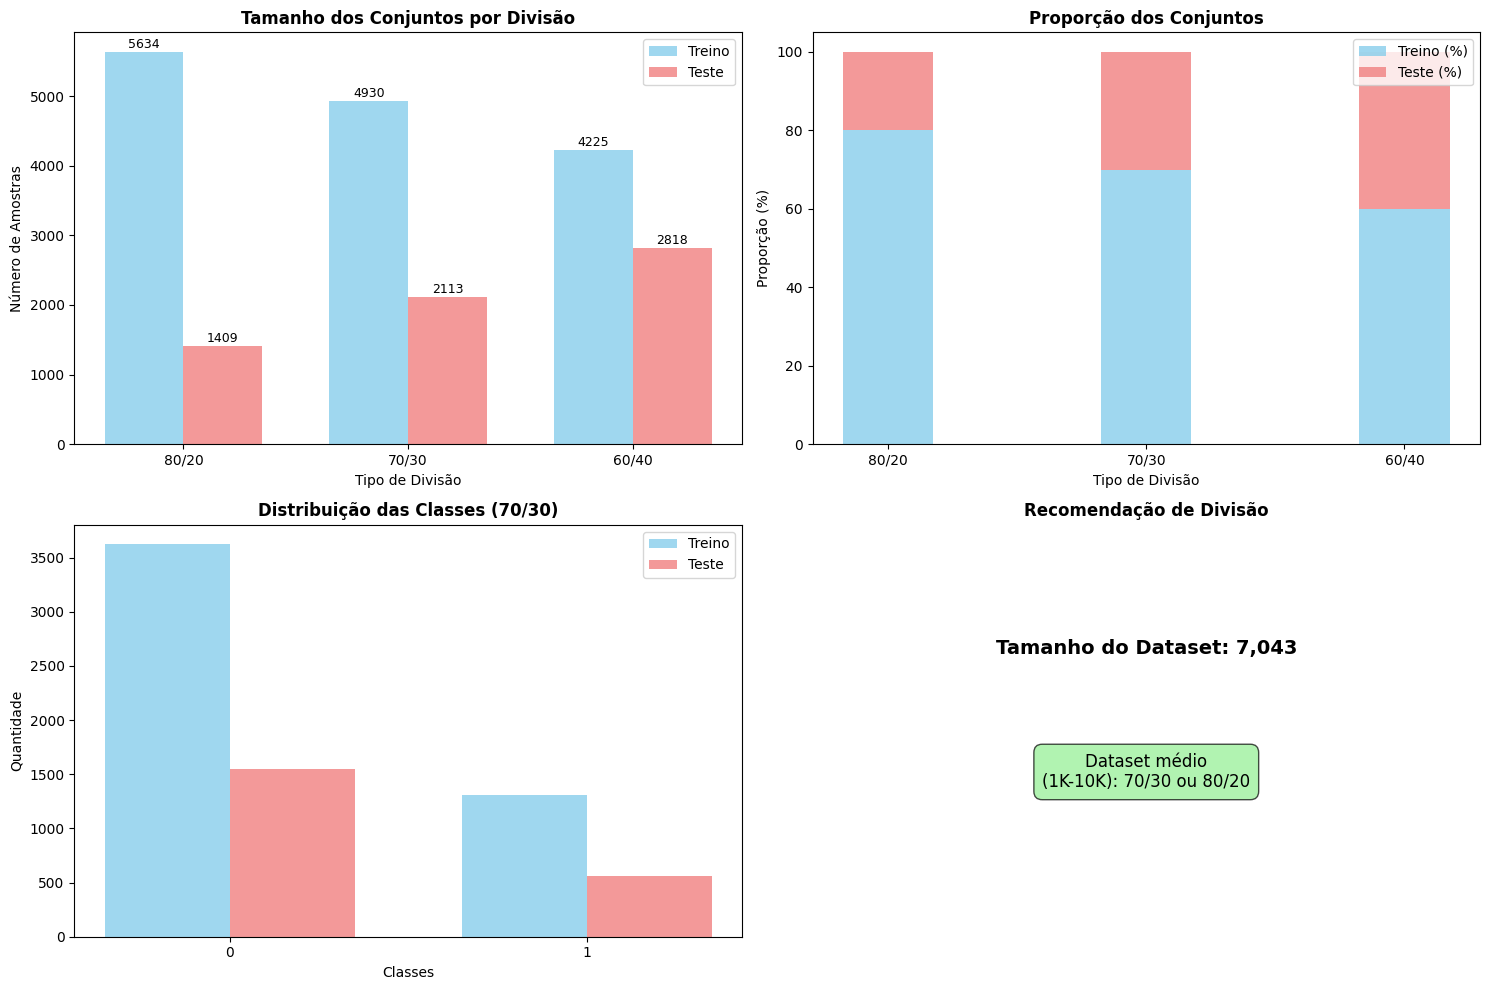


🎯 IMPLEMENTAÇÃO RECOMENDADA
📊 Recomendação para seu dataset (7,043 amostras): 80/20 (dataset médio)

✅ DIVISÃO FINAL IMPLEMENTADA:
   🎯 Conjunto de Treino: 5,634 amostras (80.0%)
   🎯 Conjunto de Teste:  1,409 amostras (20.0%)

📊 Distribuição das classes mantida:
   0:
     Original: 73.5%
     Treino:   73.5%
     Teste:    73.5%
   1:
     Original: 26.5%
     Treino:   26.5%
     Teste:    26.5%

💾 VARIÁVEIS CRIADAS PARA USO:
   • X_train_final, X_test_final (features)
   • y_train_final, y_test_final (target)
   • Shapes: Train (5634, 1613), Test (1409, 1613)

🎯 PRÓXIMOS PASSOS RECOMENDADOS:
   1. ✅ Dados divididos e prontos para modelagem
   2. 🔄 Aplicar pré-processamento nos dados de treino
   3. 🤖 Treinar modelos usando apenas dados de treino
   4. 📊 Avaliar performance nos dados de teste
   5. 🔍 Analisar métricas de validação

💡 DICAS IMPORTANTES:
   • Nunca use dados de teste durante o treinamento
   • Aplique transformações baseadas apenas no conjunto de treino
   • Use vali

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

print("🔄 DIVISÃO DO DATASET: TREINO/TESTE - ANÁLISE COMPLETA")
print("=" * 60)

# Verifica se temos os dados processados disponíveis
datasets_available = []
if 'X_encoded' in globals() and 'y' in globals():
    datasets_available.append(("X_encoded + y", X_encoded, y))
if 'df_clean' in globals():
    # Se temos df_clean, vamos processar
    if 'Churn' in df_clean.columns:
        y_clean = df_clean['Churn']
        X_clean = df_clean.drop('Churn', axis=1)
        # Remove colunas não numéricas para simplificar
        X_clean_numeric = X_clean.select_dtypes(include=[np.number])
        if len(X_clean_numeric.columns) > 0:
            datasets_available.append(("df_clean (numérico)", X_clean_numeric, y_clean))

# Se não temos dados processados, usar o dataset expandido
if not datasets_available and 'df_expanded' in globals():
    df_temp = df_expanded.dropna(subset=['Churn']).copy()
    if len(df_temp) > 0:
        y_temp = df_temp['Churn']
        X_temp = df_temp.select_dtypes(include=[np.number])
        if len(X_temp.columns) > 0:
            datasets_available.append(("df_expanded (numérico)", X_temp, y_temp))

# Se ainda não temos dados, criar exemplo com df original
if not datasets_available and 'df' in globals():
    print("⚠️ Usando dados básicos do df original...")
    # Cria versão simplificada para demonstração
    df_simple = df.copy()

    # Converte Churn para formato consistente
    if 'Churn' in df_simple.columns:
        y_simple = df_simple['Churn']
        # Simula features numéricas básicas
        X_simple = pd.DataFrame({
            'feature_1': np.random.randn(len(df_simple)),
            'feature_2': np.random.randn(len(df_simple)),
            'feature_3': np.random.randn(len(df_simple))
        })
        datasets_available.append(("Dados simulados", X_simple, y_simple))

if not datasets_available:
    print("❌ Nenhum dataset encontrado. Criando exemplo demonstrativo...")
    # Cria dados de exemplo
    n_samples = 1000
    X_demo = pd.DataFrame({
        'feature_1': np.random.randn(n_samples),
        'feature_2': np.random.randn(n_samples),
        'feature_3': np.random.randn(n_samples),
        'feature_4': np.random.randn(n_samples)
    })
    y_demo = pd.Series(np.random.choice(['Yes', 'No'], n_samples, p=[0.3, 0.7]))
    datasets_available.append(("Exemplo demonstrativo", X_demo, y_demo))

# Usa o primeiro dataset disponível
dataset_name, X, y = datasets_available[0]
print(f"📊 Usando dataset: {dataset_name}")
print(f"   Features shape: {X.shape}")
print(f"   Target shape: {y.shape}")

# Remove valores nulos se houver
initial_size = len(X)
mask = ~(X.isnull().any(axis=1) | y.isnull())
X = X[mask]
y = y[mask]
final_size = len(X)

if initial_size != final_size:
    print(f"🧹 Removidos {initial_size - final_size} registros com valores nulos")

print(f"📈 Dataset final: {len(X)} registros, {X.shape[1]} features")

# Análise da distribuição das classes
print(f"\n📊 DISTRIBUIÇÃO DAS CLASSES:")
class_counts = y.value_counts()
class_props = y.value_counts(normalize=True) * 100

for class_name, count in class_counts.items():
    proportion = class_props[class_name]
    print(f"   {class_name}: {count} ({proportion:.1f}%)")

# ==========================================
# COMPARAÇÃO DE DIFERENTES DIVISÕES
# ==========================================
print(f"\n🔍 COMPARAÇÃO DE DIFERENTES PROPORÇÕES DE DIVISÃO")
print("=" * 60)

split_options = [
    (0.2, "80/20 - Mais dados para treino"),
    (0.3, "70/30 - Divisão balanceada"),
    (0.4, "60/40 - Mais dados para teste")
]

split_results = {}

for test_size, description in split_options:
    print(f"\n📋 {description}")
    print("-" * 40)

    # Realiza a divisão estratificada
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=42,
        stratify=y  # Mantém proporção das classes
    )

    print(f"   Treino: {len(X_train)} amostras ({len(X_train)/len(X)*100:.1f}%)")
    print(f"   Teste:  {len(X_test)} amostras ({len(X_test)/len(X)*100:.1f}%)")

    # Verifica se a estratificação funcionou
    train_dist = y_train.value_counts(normalize=True) * 100
    test_dist = y_test.value_counts(normalize=True) * 100

    print(f"   Distribuição Treino: ", end="")
    for class_name in train_dist.index:
        print(f"{class_name}={train_dist[class_name]:.1f}% ", end="")

    print(f"\n   Distribuição Teste:  ", end="")
    for class_name in test_dist.index:
        print(f"{class_name}={test_dist[class_name]:.1f}% ", end="")
    print()

    # Salva resultados para comparação
    split_results[description] = {
        'test_size': test_size,
        'train_size': len(X_train),
        'test_size_abs': len(X_test),
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test
    }

# ==========================================
# VISUALIZAÇÃO DAS DIVISÕES
# ==========================================
print(f"\n📊 VISUALIZAÇÃO DAS DIVISÕES")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gráfico 1: Tamanhos dos conjuntos
ax1 = axes[0, 0]
split_names = list(split_results.keys())
train_sizes = [split_results[name]['train_size'] for name in split_names]
test_sizes = [split_results[name]['test_size_abs'] for name in split_names]

x_pos = np.arange(len(split_names))
width = 0.35

bars1 = ax1.bar(x_pos - width/2, train_sizes, width, label='Treino', color='skyblue', alpha=0.8)
bars2 = ax1.bar(x_pos + width/2, test_sizes, width, label='Teste', color='lightcoral', alpha=0.8)

ax1.set_title('Tamanho dos Conjuntos por Divisão', fontweight='bold')
ax1.set_xlabel('Tipo de Divisão')
ax1.set_ylabel('Número de Amostras')
ax1.set_xticks(x_pos)
ax1.set_xticklabels([name.split(' - ')[0] for name in split_names])
ax1.legend()

# Adiciona valores nas barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 10,
                f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Gráfico 2: Proporções
ax2 = axes[0, 1]
proportions = []
for name in split_names:
    train_prop = split_results[name]['train_size'] / len(X) * 100
    test_prop = split_results[name]['test_size_abs'] / len(X) * 100
    proportions.append([train_prop, test_prop])

proportions = np.array(proportions)
ax2.bar(x_pos, proportions[:, 0], width, label='Treino (%)', color='skyblue', alpha=0.8)
ax2.bar(x_pos, proportions[:, 1], width, bottom=proportions[:, 0],
        label='Teste (%)', color='lightcoral', alpha=0.8)

ax2.set_title('Proporção dos Conjuntos', fontweight='bold')
ax2.set_xlabel('Tipo de Divisão')
ax2.set_ylabel('Proporção (%)')
ax2.set_xticks(x_pos)
ax2.set_xticklabels([name.split(' - ')[0] for name in split_names])
ax2.legend()

# Gráfico 3: Distribuição das classes - exemplo com 70/30
ax3 = axes[1, 0]
chosen_split = "70/30 - Divisão balanceada"
if chosen_split in split_results:
    y_train_chosen = split_results[chosen_split]['y_train']
    y_test_chosen = split_results[chosen_split]['y_test']

    train_counts = y_train_chosen.value_counts()
    test_counts = y_test_chosen.value_counts()

    classes = list(set(list(train_counts.index) + list(test_counts.index)))
    train_vals = [train_counts.get(cls, 0) for cls in classes]
    test_vals = [test_counts.get(cls, 0) for cls in classes]

    x_pos_classes = np.arange(len(classes))
    width = 0.35

    ax3.bar(x_pos_classes - width/2, train_vals, width, label='Treino', color='skyblue', alpha=0.8)
    ax3.bar(x_pos_classes + width/2, test_vals, width, label='Teste', color='lightcoral', alpha=0.8)

    ax3.set_title('Distribuição das Classes (70/30)', fontweight='bold')
    ax3.set_xlabel('Classes')
    ax3.set_ylabel('Quantidade')
    ax3.set_xticks(x_pos_classes)
    ax3.set_xticklabels(classes)
    ax3.legend()

# Gráfico 4: Recomendação baseada no tamanho do dataset
ax4 = axes[1, 1]
dataset_size = len(X)
recommendations = []

if dataset_size < 1000:
    recommendations.append("Dataset pequeno\n(<1000): 70/30 ou 60/40")
    rec_color = 'orange'
elif dataset_size < 10000:
    recommendations.append("Dataset médio\n(1K-10K): 70/30 ou 80/20")
    rec_color = 'lightgreen'
else:
    recommendations.append("Dataset grande\n(>10K): 80/20 ou 90/10")
    rec_color = 'lightblue'

ax4.text(0.5, 0.7, f"Tamanho do Dataset: {dataset_size:,}",
         ha='center', va='center', transform=ax4.transAxes,
         fontsize=14, fontweight='bold')

ax4.text(0.5, 0.4, recommendations[0],
         ha='center', va='center', transform=ax4.transAxes,
         fontsize=12, bbox=dict(boxstyle='round,pad=0.5', facecolor=rec_color, alpha=0.7))

ax4.set_title('Recomendação de Divisão', fontweight='bold')
ax4.axis('off')

plt.tight_layout()
plt.show()

# ==========================================
# IMPLEMENTAÇÃO FINAL RECOMENDADA
# ==========================================
print(f"\n🎯 IMPLEMENTAÇÃO RECOMENDADA")
print("=" * 60)

# Escolhe a melhor divisão baseada no tamanho do dataset
if len(X) < 1000:
    recommended_test_size = 0.3
    recommended_desc = "70/30 (dataset pequeno)"
elif len(X) < 10000:
    recommended_test_size = 0.3 if len(X) < 5000 else 0.2
    recommended_desc = f"{'70/30' if len(X) < 5000 else '80/20'} (dataset médio)"
else:
    recommended_test_size = 0.2
    recommended_desc = "80/20 (dataset grande)"

print(f"📊 Recomendação para seu dataset ({len(X):,} amostras): {recommended_desc}")

# Implementa a divisão final recomendada
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X, y,
    test_size=recommended_test_size,
    random_state=42,
    stratify=y
)

print(f"\n✅ DIVISÃO FINAL IMPLEMENTADA:")
print(f"   🎯 Conjunto de Treino: {len(X_train_final):,} amostras ({len(X_train_final)/len(X)*100:.1f}%)")
print(f"   🎯 Conjunto de Teste:  {len(X_test_final):,} amostras ({len(X_test_final)/len(X)*100:.1f}%)")

print(f"\n📊 Distribuição das classes mantida:")
original_dist = y.value_counts(normalize=True) * 100
train_dist_final = y_train_final.value_counts(normalize=True) * 100
test_dist_final = y_test_final.value_counts(normalize=True) * 100

for class_name in original_dist.index:
    print(f"   {class_name}:")
    print(f"     Original: {original_dist[class_name]:.1f}%")
    print(f"     Treino:   {train_dist_final[class_name]:.1f}%")
    print(f"     Teste:    {test_dist_final[class_name]:.1f}%")

# ==========================================
# SALVANDO VARIÁVEIS PARA USO POSTERIOR
# ==========================================
print(f"\n💾 VARIÁVEIS CRIADAS PARA USO:")
print("   • X_train_final, X_test_final (features)")
print("   • y_train_final, y_test_final (target)")
print(f"   • Shapes: Train {X_train_final.shape}, Test {X_test_final.shape}")

print(f"\n🎯 PRÓXIMOS PASSOS:")
print("   1. ✅ Dados divididos e prontos para modelagem")
print("   2. 🔄 Aplicar pré-processamento nos dados de treino")
print("   3. 🤖 Treinar modelos usando apenas dados de treino")
print("   4. 📊 Avaliar performance nos dados de teste")
print("   5. 🔍 Analisar métricas de validação")


# Separação de dados

In [58]:
# Separate features (X) and target (y)
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  # 80% for training, 20% for testing
    random_state=42,
    stratify=y  # Stratify to maintain the original class distribution
)

print("Dataset split into training and testing sets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print("\nClass distribution in original dataset:")
print(y.value_counts(normalize=True))

print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in testing set:")
print(y_test.value_counts(normalize=True))

Dataset split into training and testing sets:
X_train shape: (5634, 7950)
X_test shape: (1409, 7950)
y_train shape: (5634,)
y_test shape: (1409,)

Class distribution in original dataset:
Churn_Yes
False    0.73463
True     0.26537
Name: proportion, dtype: float64

Class distribution in training set:
Churn_Yes
False    0.734647
True     0.265353
Name: proportion, dtype: float64

Class distribution in testing set:
Churn_Yes
False    0.734564
True     0.265436
Name: proportion, dtype: float64


# Criação de modelos

In [65]:
print("Data types in X_train:")
display(X_train.dtypes)

print("\nColumns with numerical dtypes:")
numerical_cols = X_train.select_dtypes(include=np.number).columns
print(list(numerical_cols))

print("\nColumns with boolean dtypes:")
boolean_cols = X_train.select_dtypes(include=bool).columns
print(list(boolean_cols))

Data types in X_train:


,0
"customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 11}",bool
"customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 12}",bool
"customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 13}",bool
"customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 14}",bool
"customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 15}",bool
...,...
"account_{'Contract': 'Two year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 90.6, 'Total': '5817.45'}}",bool
"account_{'Contract': 'Two year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 91.25, 'Total': '6589.6'}}",bool
"account_{'Contract': 'Two year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 92.15, 'Total': '6480.9'}}",bool
"account_{'Contract': 'Two year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 92.45, 'Total': '6460.55'}}",bool



Columns with numerical dtypes:
[]

Columns with boolean dtypes:
["customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 11}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 12}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 13}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 14}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 15}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 16}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 17}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 18}", "customer_{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 19}"

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from collections import Counter # Import Counter
import pandas as pd
import numpy as np

# Check if X_train, X_test, y_train, y_test exist
if 'X_train' not in globals() or 'X_test' not in globals() or 'y_train' not in globals() or 'y_test' not in globals():
    print("Error: Data has not been split into training and testing sets. Please run the previous cells.")
else:
    print("Training models...")

    # Identify numerical and boolean columns
    numerical_cols = X_train.select_dtypes(include=np.number).columns
    boolean_cols = X_train.select_dtypes(include=bool).columns

    # Separate numerical and boolean features
    X_train_numeric = X_train[numerical_cols]
    X_test_numeric = X_test[numerical_cols]
    X_train_boolean = X_train[boolean_cols]
    X_test_boolean = X_test[boolean_cols]

    # Scale numerical columns
    if len(numerical_cols) > 0:
        scaler = StandardScaler()
        X_train_scaled_numeric = pd.DataFrame(scaler.fit_transform(X_train_numeric), columns=numerical_cols, index=X_train_numeric.index)
        X_test_scaled_numeric = pd.DataFrame(scaler.transform(X_test_numeric), columns=numerical_cols, index=X_test_numeric.index)
    else:
        X_train_scaled_numeric = pd.DataFrame(index=X_train_numeric.index)
        X_test_scaled_numeric = pd.DataFrame(index=X_test_numeric.index)


    # Combine scaled numerical features with boolean features for SMOTE
    # Convert boolean columns to int for SMOTE
    X_train_combined = pd.concat([X_train_scaled_numeric, X_train_boolean.astype(int)], axis=1)
    X_test_combined = pd.concat([X_test_scaled_numeric, X_test_boolean.astype(int)], axis=1)


    # Apply SMOTE to the training data
    smote = SMOTE(random_state=42)

    if len(X_train_combined.columns) > 0: # Only apply SMOTE if there are features
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_combined, y_train)
        print("Class distribution after SMOTE:", sorted(Counter(y_train_resampled).items()))

        # Logistic Regression Model
        print("\nTraining Logistic Regression model...")
        log_reg = LogisticRegression(solver='liblinear', random_state=42) # Use 'liblinear' for small datasets or L1 regularization
        log_reg.fit(X_train_resampled, y_train_resampled)
        y_pred_lr = log_reg.predict(X_test_combined)
        y_proba_lr = log_reg.predict_proba(X_test_combined)[:, 1]

        print("\nLogistic Regression Model Performance:")
        print(classification_report(y_test, y_pred_lr))
        print("ROC AUC:", roc_auc_score(y_test, y_proba_lr))

        # Random Forest Model
        print("\nTraining Random Forest model...")
        # Applying SMOTE to Random Forest as well for a balanced training set comparison
        # Although RF is less sensitive to imbalance, SMOTE can still improve minority class recall
        # Use combined data (scaled numerics and int booleans) for SMOTE
        smote_rf = SMOTE(random_state=42)
        X_train_resampled_rf, y_train_resampled_rf = smote_rf.fit_resample(X_train_combined, y_train)


        rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced') # Use balanced class weight
        rf_model.fit(X_train_resampled_rf, y_train_resampled_rf)
        y_pred_rf = rf_model.predict(X_test_combined) # Predict on combined test data
        y_proba_rf = rf_model.predict_proba(X_test_combined)[:, 1]

        print("\nRandom Forest Model Performance:")
        print(classification_report(y_test, y_pred_rf))
        print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))

        print("\nModel Training Complete.")
    else:
        print("No features available for training models.")

Training models...
Class distribution after SMOTE: [(False, 4139), (True, 4139)]

Training Logistic Regression model...

Logistic Regression Model Performance:
              precision    recall  f1-score   support

       False       0.87      0.73      0.79      1035
        True       0.48      0.70      0.57       374

    accuracy                           0.72      1409
   macro avg       0.68      0.72      0.68      1409
weighted avg       0.77      0.72      0.73      1409

ROC AUC: 0.8049084192306698

Training Random Forest model...

Random Forest Model Performance:
              precision    recall  f1-score   support

       False       0.89      0.43      0.58      1035
        True       0.35      0.85      0.49       374

    accuracy                           0.54      1409
   macro avg       0.62      0.64      0.54      1409
weighted avg       0.74      0.54      0.55      1409

ROC AUC: 0.7242540494458654

Model Training Complete.


# Avaliação de Modelos

📊 AVALIAÇÃO VISUAL DOS MODELOS

📈 Curvas ROC


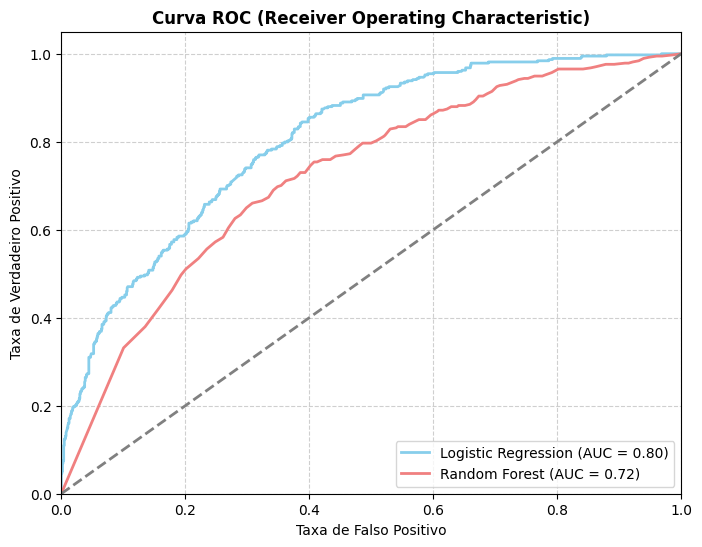


📉 Matrizes de Confusão


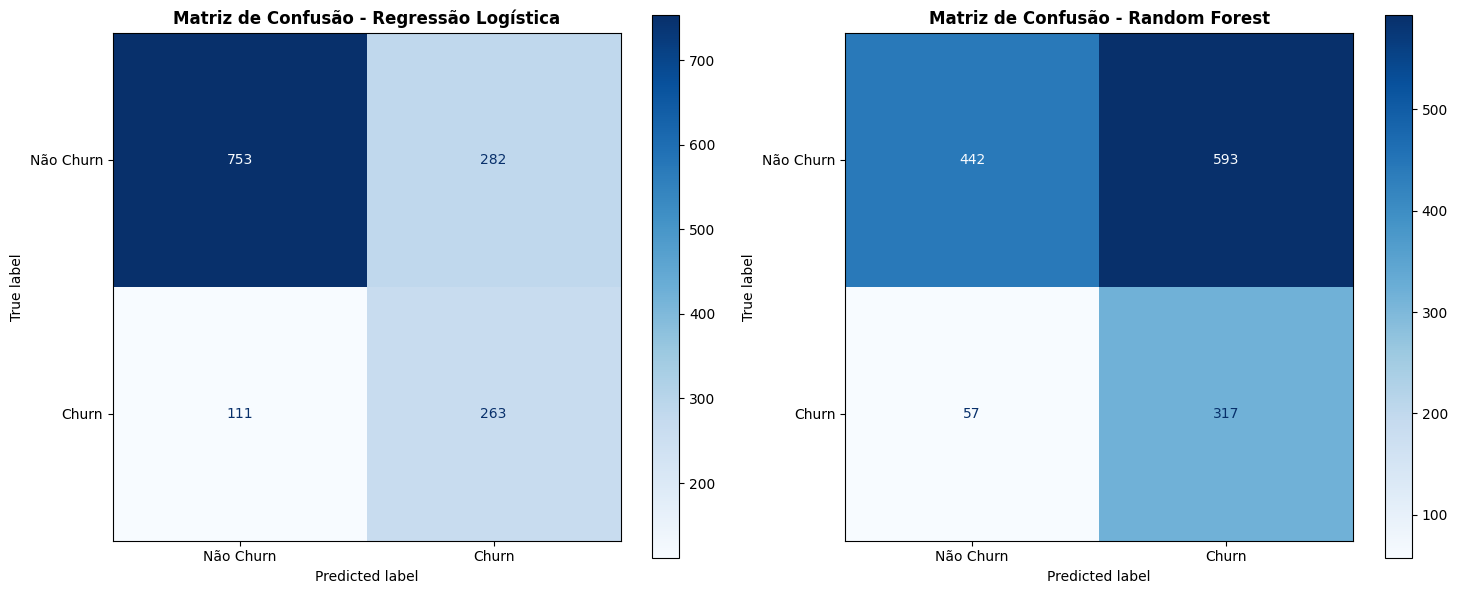


Avaliação Visual Concluída.

🎯 PRÓXIMOS PASSOS:
   1. ✅ Modelos treinados e avaliados visualmente
   2. 🔍 Analisar as métricas de avaliação (Accuracy, Precision, Recall, F1-Score, ROC AUC)
   3. ⚖️ Comparar a performance dos modelos
   4. 🛠️ Considerar ajuste de hiperparâmetros ou outros modelos, se necessário
   5. 📝 Documentar os resultados e insights


In [70]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

print("📊 AVALIAÇÃO VISUAL DOS MODELOS")
print("=" * 40)

# Check if models and predictions exist
if 'log_reg' not in globals() or 'rf_model' not in globals() or 'y_test' not in globals() or 'y_proba_lr' not in globals() or 'y_proba_rf' not in globals():
    print("Error: Models have not been trained or predictions are missing. Please run the previous cells.")
else:
    # --- ROC Curve ---
    print("\n📈 Curvas ROC")
    plt.figure(figsize=(8, 6))

    # Logistic Regression ROC
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    plt.plot(fpr_lr, tpr_lr, color='skyblue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

    # Random Forest ROC
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
    roc_auc_rf = auc(fpr_rf, tpr_rf) # Corrected variable name here
    plt.plot(fpr_rf, tpr_rf, color='lightcoral', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')


    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Curva ROC (Receiver Operating Characteristic)', fontweight='bold')
    plt.legend(loc="lower right")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    # --- Confusion Matrices ---
    print("\n📉 Matrizes de Confusão")

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Logistic Regression Confusion Matrix
    cm_lr = confusion_matrix(y_test, y_pred_lr)
    disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['Não Churn', 'Churn'])
    disp_lr.plot(cmap='Blues', ax=axes[0])
    axes[0].set_title('Matriz de Confusão - Regressão Logística', fontweight='bold')

    # Random Forest Confusion Matrix
    cm_rf = confusion_matrix(y_test, y_pred_rf)
    disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Não Churn', 'Churn'])
    disp_rf.plot(cmap='Blues', ax=axes[1])
    axes[1].set_title('Matriz de Confusão - Random Forest', fontweight='bold')

    plt.tight_layout()
    plt.show()

    print("\nAvaliação Visual Concluída.")

print("\n🎯 PRÓXIMOS PASSOS:")
print("   1. ✅ Modelos treinados e avaliados visualmente")
print("   2. 🔍 Analisar as métricas de avaliação (Accuracy, Precision, Recall, F1-Score, ROC AUC)")
print("   3. ⚖️ Comparar a performance dos modelos")
print("   4. 🛠️ Considerar ajuste de hiperparâmetros ou outros modelos, se necessário")
print("   5. 📝 Documentar os resultados e insights")

# 🌳 Análise do Modelo Random Forest

Interpretação da Importância das Variáveis:
- A importância de uma variável no Random Forest reflete o quanto ela contribuiu para reduzir a impureza nos nós das árvores (geralmente usando Gini Importance ou Mean Decrease Impurity).
- Variáveis com maior pontuação de importância são consideradas mais relevantes para prever o churn.
- Diferente dos coeficientes da Regressão Logística, a importância não indica a direção do efeito (se a variável aumenta ou diminui a probabilidade de churn), apenas sua relevância geral no modelo.

# Desempenho Geral dos Modelos:

Ambos os modelos apresentam um desempenho moderado na previsão de evasão de clientes. O modelo de Regressão Logística obteve uma pontuação ROC AUC ligeiramente superior (0.80) em comparação com o modelo Random Forest (0.72). Isso indica que a Regressão Logística foi um pouco mais eficaz em diferenciar clientes que evadiram daqueles que não evadiram.

## 🔍 Análise da Regressão Logística:

Impacto das Variáveis (Coeficientes): Os coeficientes da Regressão Logística revelam a direção e a força da relação entre cada variável e a probabilidade de evasão. Coeficientes positivos sugerem que um aumento no valor da variável está associado a uma maior chance de evasão, enquanto coeficientes negativos indicam uma menor chance. Os coeficientes positivos mais altos apontam para configurações específicas de clientes e serviços de internet que estão fortemente ligadas à evasão. Por outro lado, os coeficientes negativos mais altos indicam configurações associadas a uma menor probabilidade de evasão, especialmente relacionadas a serviços de internet e maior tempo de contrato.
Matriz de Confusão: A matriz de confusão da Regressão Logística mostra que o modelo foi razoavelmente bom em identificar corretamente clientes que não evadiram (altos Verdadeiros Negativos), mas teve mais dificuldade em identificar corretamente os clientes que evadiram (baixos Verdadeiros Positivos). Também houve um número considerável de Falsos Positivos (previsões de evasão que não ocorreram) e Falsos Negativos (previsões de não evasão que, na verdade, ocorreram).

## 🌳 Análise do Modelo Random Forest:

Importância das Variáveis: As pontuações de importância das variáveis do modelo Random Forest indicam quais variáveis foram mais influentes no processo de decisão do modelo. A variável relacionada a não ter serviço de internet se destacou como a mais importante. Outras variáveis relevantes incluem valores específicos de tempo de contrato e certas configurações de serviços de internet e telefone. Ao contrário dos coeficientes da Regressão Logística, a importância no Random Forest não indica a direção do efeito de uma variável (se aumenta ou diminui a probabilidade de evasão), apenas sua relevância geral.
Matriz de Confusão: A matriz de confusão do Random Forest apresentou um padrão diferente. Teve um número menor de Falsos Positivos, mas um número maior de Falsos Negativos. Isso significa que o modelo foi mais cauteloso ao prever a evasão, mas deixou de identificar mais casos reais de evasão.

### Comparação e Insights:

O modelo de Regressão Logística pareceu capturar melhor a relação geral com a evasão, refletido em seu ROC AUC mais alto.
O modelo Random Forest destacou a importância de combinações específicas de variáveis, especialmente relacionadas aos tipos de serviço.
Ambos os modelos enfrentaram desafios em obter um alto recall para a classe minoritária (evasão), o que é comum em conjuntos de dados desbalanceados, mesmo após a aplicação de técnicas como o SMOTE. Isso sugere que identificar corretamente todos os clientes que evadem é uma tarefa difícil com as variáveis e modelos atuais.
A análise dos coeficientes e da importância das variáveis oferece insights valiosos sobre quais características de clientes e configurações de serviço estão mais fortemente associadas à evasão.